# **Profitable App Profiles for the App Store and Google Play Markets**
Our aim in this project is to find mobile app profiles that are profitable for the App Store and Google Play markets. We're working as data analysts for a company that builds Android and iOS mobile apps, and our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build.

At our company, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.


## Opening and exploring data:

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.
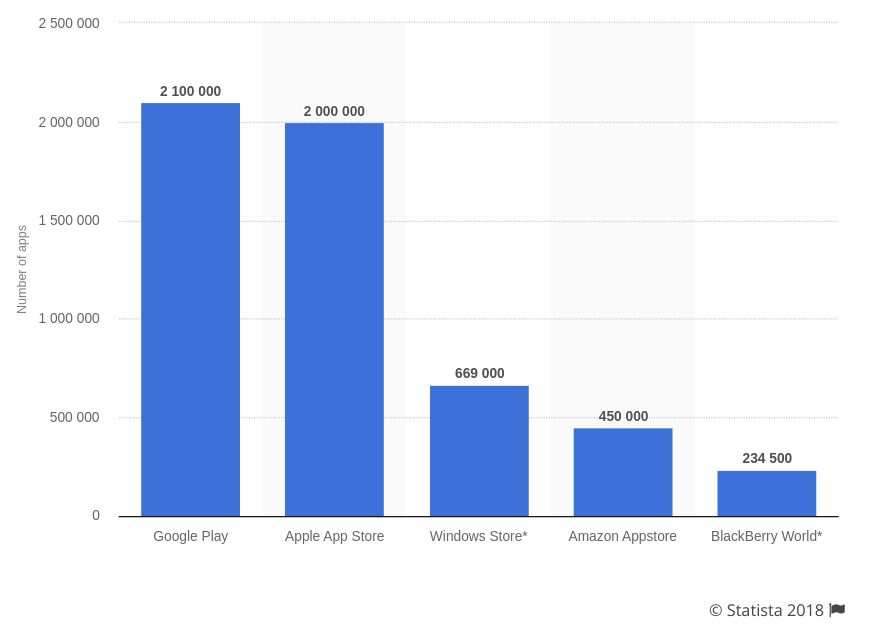

Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckily, here are two data sets that seem suitable for our goals:
* [A dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. You can download the data set directly from this link.
* [
A datase](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps)t containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. You can download the data set directly from this link.

Let's start by opening the two data sets and then continue with exploring the data.

In [4]:
from csv import reader

### The Google Play data set ###
opened_file = open('googleplaystore.csv', encoding='utf-8')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

### The App Store data set ###
opened_file = open('AppleStore.csv', encoding='utf-8')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios=ios[1:]

To make them easier to explore, we created a function named explore_data() that you can repeatedly use to print rows in a readable way.

In [6]:
def explore_data(dataset,start,end, rows_and_columns=True):
    dataset_slicer=dataset[start:end]
    for row in dataset_slicer:
        print(row)
    if rows_and_columns:
        print('Number of rows: ', len(dataset))
        print('Number of columns: ', len(dataset[0]))
    


In [7]:
print(android_header)
google_play=explore_data(android,0,1)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
Number of rows:  10841
Number of columns:  13


In [8]:
print(ios_header)
Appstore=explore_data(ios,0,1)

['', 'id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']
Number of rows:  7197
Number of columns:  17


## Deleting Wrong Data

The Google Play dataset has a dedicated [discussion section](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps/discussion/106176) and we can see that one of the discussions describes an error for a certain row

In [11]:
print(android_header)
print(android[1])
print(android[10472])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


The problem is missing value in the 'Category' column. Consequencely, We need to delete this row.

In [13]:
del android[10472]
len(android)

10840

## Removing Duplicate Entries: Part One

Check the data for duplicate loops. In total, there are 1,181 cases where an app occurs more than once

In [16]:
duplicate_app=[]
unique_app=[]
for app in android:
    name=app[0]
    if name in unique_app:
        duplicate_app.append(name)
    else:
        unique_app.append(name)
print(len(duplicate_app))   
print(len(unique_app))

1181
9659


In [17]:
for app in android:
    name=app[0]
    if name =="Instagram":
     print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


Let's use the reviews_max dictionary to remove the duplicates. For the duplicate cases, we'll only keep the entries with the highest number of reviews

In [19]:
reviews_max={}
for app in android:
    name = app[0]
    n_reviews =float(app[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name]= n_reviews
    elif name not in reviews_max:
        reviews_max[name]= n_reviews

In [20]:
print(len(reviews_max))

9659


Let's quickly explore the new data set, and confirm that the number of rows is 9,659

In [22]:
android_clean=[]
already_added=[]
for app in android:
    name=app[0]
    n_reviews=float(app[3])
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(app)
        already_added.append(name)
        
explore_data(android_clean,0,2,True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']
Number of rows:  9659
Number of columns:  13


## Removing Non-English Apps

In [24]:
def is_english(a_string):
    
    for character in a_string:
        if ord(character) > 127:
            return False
    return True
        

In [25]:
print(is_english(' '))

True


To minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters

In [27]:
def is_english(a_string):
    non_ascii=0
    for character in a_string:
        if ord(character)>127:
            non_ascii+=1
    if non_ascii > 3:
        return False
    else:
        return True
print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))


True
False
True
True


Below, we use the is_english() function to filter out the non-English apps for both data sets

In [29]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[2]
    if is_english(name):
        ios_english.append(app)
        

In [30]:
explore_data(android_english, 0, 4, True)
print('\n')
explore_data(ios_english, 0, 4, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']
['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']
['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']
Number of rows:  9614
Number of columns:  13


['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']
['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161

## Isolating the Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis. Below, we isolate the free apps for both our data sets. 

In [33]:
android_final=[]
for app in android_english:
    price= app[7]
    if price == '0':
       android_final.append(app)

ios_final=[]
for app in ios_english:
    price=float(app[5])
    if price==0:
        ios_final.append(app)
explore_data(android_final,0,2,True)
explore_data(ios_final,0,2,True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']
Number of rows:  8864
Number of columns:  13
['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']
['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']
Number of rows:  3222
Number of columns:  17


We're left with 8864 Android apps and 3222 iOS apps, which should be enough for our analysis.

## Most Common Apps by Genre

As we mentioned in the introduction, our goal is to determine the kinds of apps that are likely to attract more users because the number of people using our apps affect our revenue.

To minimize risks and overhead, our validation strategy for an app idea has three steps:

* Build a minimal Android version of the app, and add it to Google Play.
* If the app has a good response from users, we develop it further.
* If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.
  
Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful in both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by determining the most common genres for each market. For this, we'll need to build frequency tables for a few columns in our datasets.

We'll build two functions we can use to analyze the frequency tables:
*  
One function to generate frequency tables that show percentag
* s
Another function we can use to display the percentages in a descending orderder

Let's now create a function for generating frequency tables and use it in combination with the display_table() function

In [39]:
def freq_table(dataset,index):
    table= {}
    total=0
    for row in dataset:
        total +=1
        value = row[index]
        if value in table:
            table[value]+=1
        else:
            table[value]=1

    table_percentages={}
    for key in table:
        percentage=(table[key]/total)*100
        table_percentages[key]=percentage
        
    return table_percentages


def display_table(dataset,index):
    table = freq_table(dataset,index)
    table_display=[]
    for key in table:
        key_val_as_tuple=(table[key],key)
        table_display.append(key_val_as_tuple)
        
    table_sorted=sorted(table_display, reverse=True)
    for entry in table_sorted:
        print(entry[1],': ', entry[0])

We start by examining the frequency table for the prime_genre column of the App Store data set.

In [41]:
display_table(ios_final,-5)

Games :  58.16263190564867
Entertainment :  7.883302296710118
Photo & Video :  4.9658597144630665
Education :  3.662321539416512
Social Networking :  3.2898820608317814
Shopping :  2.60707635009311
Utilities :  2.5139664804469275
Sports :  2.1415270018621975
Music :  2.0484171322160147
Health & Fitness :  2.0173805090006205
Productivity :  1.7380509000620732
Lifestyle :  1.5828677839851024
News :  1.3345747982619491
Travel :  1.2414649286157666
Finance :  1.1173184357541899
Weather :  0.8690254500310366
Food & Drink :  0.8069522036002483
Reference :  0.5586592178770949
Business :  0.5276225946617008
Book :  0.4345127250155183
Navigation :  0.186219739292365
Medical :  0.186219739292365
Catalogs :  0.12414649286157665


We can see that among the free English apps, more than a half (58.16%) are games. Entertaintment apps are close to 8%, followed by photo & video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking and shopping, which is approximate 3%. 

The general impression is that the free App Store is dominated by apps that are designed for fun (games, entertaintment, photo & video, social networking, sport, music, etc.), while app withh practical purposes (education, shopping, utilities, lifestyle,etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users - the demand might not be the same as the offer.

Let's continue by examining the Genres and Category columns of the Google Play data set (two columns which seem to be related).

In [44]:
display_table(android_final,1) #Category

FAMILY :  18.907942238267147
GAME :  9.724729241877256
TOOLS :  8.461191335740072
BUSINESS :  4.591606498194946
LIFESTYLE :  3.9034296028880866
PRODUCTIVITY :  3.892148014440433
FINANCE :  3.7003610108303246
MEDICAL :  3.531137184115524
SPORTS :  3.395758122743682
PERSONALIZATION :  3.3167870036101084
COMMUNICATION :  3.2378158844765346
HEALTH_AND_FITNESS :  3.0798736462093865
PHOTOGRAPHY :  2.944494584837545
NEWS_AND_MAGAZINES :  2.7978339350180503
SOCIAL :  2.6624548736462095
TRAVEL_AND_LOCAL :  2.33528880866426
SHOPPING :  2.2450361010830324
BOOKS_AND_REFERENCE :  2.1435018050541514
DATING :  1.861462093862816
VIDEO_PLAYERS :  1.7937725631768955
MAPS_AND_NAVIGATION :  1.3989169675090252
FOOD_AND_DRINK :  1.2409747292418771
EDUCATION :  1.1620036101083033
ENTERTAINMENT :  0.9589350180505415
LIBRARIES_AND_DEMO :  0.9363718411552346
AUTO_AND_VEHICLES :  0.9250902527075812
HOUSE_AND_HOME :  0.8235559566787004
WEATHER :  0.8009927797833934
EVENTS :  0.7107400722021661
PARENTING :  0.6543

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.).

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column.


In [46]:
display_table(android_final,-4) #Genres

Tools :  8.449909747292418
Entertainment :  6.069494584837545
Education :  5.347472924187725
Business :  4.591606498194946
Productivity :  3.892148014440433
Lifestyle :  3.892148014440433
Finance :  3.7003610108303246
Medical :  3.531137184115524
Sports :  3.463447653429603
Personalization :  3.3167870036101084
Communication :  3.2378158844765346
Action :  3.1024368231046933
Health & Fitness :  3.0798736462093865
Photography :  2.944494584837545
News & Magazines :  2.7978339350180503
Social :  2.6624548736462095
Travel & Local :  2.3240072202166067
Shopping :  2.2450361010830324
Books & Reference :  2.1435018050541514
Simulation :  2.0419675090252705
Dating :  1.861462093862816
Arcade :  1.8501805054151623
Video Players & Editors :  1.7712093862815883
Casual :  1.7599277978339352
Maps & Navigation :  1.3989169675090252
Food & Drink :  1.2409747292418771
Puzzle :  1.128158844765343
Racing :  0.9927797833935018
Role Playing :  0.9363718411552346
Libraries & Demo :  0.9363718411552346
Aut

The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

Below, we calculate the average number of user ratings per app genre on the App Store:


In [50]:
avg_ratings_per_genre = []
genres_ios = freq_table(ios_final, -5)
for genre in genres_ios:
    total = 0       # store the sum of user ratings
    len_genre = 0   # store the number of apps specific to each genre
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:
            n_ratings = float(app[6])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    avg_ratings_per_genre.append((genre, avg_n_ratings))

sorted_avg_ratings_per_genre = sorted(avg_ratings_per_genre, key=lambda x: x[1], reverse=True)
sorted_avg_ratings_per_genre
        

[('Navigation', 86090.33333333333),
 ('Reference', 74942.11111111111),
 ('Social Networking', 71548.34905660378),
 ('Music', 57326.530303030304),
 ('Weather', 52279.892857142855),
 ('Book', 39758.5),
 ('Food & Drink', 33333.92307692308),
 ('Finance', 31467.944444444445),
 ('Photo & Video', 28441.54375),
 ('Travel', 28243.8),
 ('Shopping', 26919.690476190477),
 ('Health & Fitness', 23298.015384615384),
 ('Sports', 23008.898550724636),
 ('Games', 22788.6696905016),
 ('News', 21248.023255813954),
 ('Productivity', 21028.410714285714),
 ('Utilities', 18684.456790123455),
 ('Lifestyle', 16485.764705882353),
 ('Entertainment', 14029.830708661417),
 ('Business', 7491.117647058823),
 ('Education', 7003.983050847458),
 ('Catalogs', 4004.0),
 ('Medical', 612.0)]

Now let's look at the genres that have an average number of reviewers above 30,000 based on the app and number of reviewers.

In [52]:
for genre in sorted_avg_ratings_per_genre:
    if genre[1]>30000:
        print('\n')
        print(genre)
        print('\n')
        for app in ios_final:
            genre_app=app[-5]
            if genre_app==genre[0]:
                print(app[2], ':', app[6])



('Navigation', 86090.33333333333)


Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Geocaching® : 12811
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5
CoPilot GPS – Car Navigation & Offline Maps : 3582
Google Maps - Navigation & Transit : 154911


('Reference', 74942.11111111111)


Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
Merriam-Webster Dictionary : 16849
Google Translate : 26786
Night Sky : 12122
WWDC : 762
Jishokun-Japanese English Dictionary & Translator : 0
教えて!goo : 0
VPN Express : 14
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE)

On average, **navigation apps** have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together.

The same pattern applies to **social networking apps**, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to **music app**, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.**

Reference **apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average ra. 
However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Stor

Other genres that seem popular include **weather, book, food and drink, and finance**. **The book genre** seems to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

* **Weather apps** — People generally don't spend too much time in-app, and the chances of making profit from in-app ads are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.
* **Food and drink** — Examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. Making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.
* **Finance apps** — These apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.
arket a bit.ing:

## Most Popular Apps by Category on Google Play

In [55]:
display_table(android_final,5)

1,000,000+ :  15.726534296028879
100,000+ :  11.552346570397113
10,000,000+ :  10.548285198555957
10,000+ :  10.198555956678701
1,000+ :  8.393501805054152
100+ :  6.915613718411552
5,000,000+ :  6.825361010830325
500,000+ :  5.561823104693141
50,000+ :  4.7721119133574
5,000+ :  4.512635379061372
10+ :  3.5424187725631766
500+ :  3.2490974729241873
50,000,000+ :  2.3014440433213
100,000,000+ :  2.1322202166064983
50+ :  1.917870036101083
5+ :  0.78971119133574
1+ :  0.5076714801444043
500,000,000+ :  0.2707581227436823
1,000,000,000+ :  0.22563176895306858
0+ :  0.04512635379061372
0 :  0.01128158844765343


One problem with this data is that is not precise. We don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to find out which app genres attract the most users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on. To perform computations, however, we'll need to convert each install number from a string to a float. We'll do this directly in the loop below, where we also compute the average number of installs for each genre (category).

In [57]:
avg_istalls_per_category = []
category_android=freq_table(android_final,1)
for category in category_android:
    total = 0       # store the sum of user installed
    len_category = 0   # store the number of apps specific to each category
    for app in android_final:
        category_app = app[1]
        if category_app == category:
            n_install = app[5]
            n_install = n_install.replace('+','')
            n_install = n_install.replace(',','')
            total += float(n_install)
            len_category += 1
    avg_n_istalls = total / len_category
    avg_istalls_per_category.append((category, avg_n_istalls))

sorted_avg_istalls_per_category = sorted(avg_istalls_per_category, key=lambda x: x[1], reverse=True)
sorted_avg_istalls_per_category

[('COMMUNICATION', 38456119.167247385),
 ('VIDEO_PLAYERS', 24727872.452830188),
 ('SOCIAL', 23253652.127118643),
 ('PHOTOGRAPHY', 17840110.40229885),
 ('PRODUCTIVITY', 16787331.344927534),
 ('GAME', 15588015.603248259),
 ('TRAVEL_AND_LOCAL', 13984077.710144928),
 ('ENTERTAINMENT', 11640705.88235294),
 ('TOOLS', 10801391.298666667),
 ('NEWS_AND_MAGAZINES', 9549178.467741935),
 ('BOOKS_AND_REFERENCE', 8767811.894736841),
 ('SHOPPING', 7036877.311557789),
 ('PERSONALIZATION', 5201482.6122448975),
 ('WEATHER', 5074486.197183099),
 ('HEALTH_AND_FITNESS', 4188821.9853479853),
 ('MAPS_AND_NAVIGATION', 4056941.7741935486),
 ('FAMILY', 3695641.8198090694),
 ('SPORTS', 3638640.1428571427),
 ('ART_AND_DESIGN', 1986335.0877192982),
 ('FOOD_AND_DRINK', 1924897.7363636363),
 ('EDUCATION', 1833495.145631068),
 ('BUSINESS', 1712290.1474201474),
 ('LIFESTYLE', 1437816.2687861272),
 ('FINANCE', 1387692.475609756),
 ('HOUSE_AND_HOME', 1331540.5616438356),
 ('DATING', 854028.8303030303),
 ('COMICS', 81765

Now let's look at the categories that have an average number of installs above 5 millions based on the app and number of reviewers.

In [59]:
for category in sorted_avg_istalls_per_category:
    if category[1]>5000000:
        print('\n')
        print(category)
        print('\n')
        for app in android_final:
            category_app=app[1]
            if category_app==category[0]:
                print(app[0], ':', app[5])



('COMMUNICATION', 38456119.167247385)


WhatsApp Messenger : 1,000,000,000+
Messenger for SMS : 10,000,000+
My Tele2 : 5,000,000+
imo beta free calls and text : 100,000,000+
Contacts : 50,000,000+
Call Free – Free Call : 5,000,000+
Web Browser & Explorer : 5,000,000+
Browser 4G : 10,000,000+
MegaFon Dashboard : 10,000,000+
ZenUI Dialer & Contacts : 10,000,000+
Cricket Visual Voicemail : 10,000,000+
TracFone My Account : 1,000,000+
Xperia Link™ : 10,000,000+
TouchPal Keyboard - Fun Emoji & Android Keyboard : 10,000,000+
Skype Lite - Free Video Call & Chat : 5,000,000+
My magenta : 1,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Seznam.cz : 1,000,000+
Antillean Gold Telegram (original version) : 100,000+
AT&T Visual Voicemail : 10,000,000+
GMX Mail : 10,000,000+
Omlet Chat : 10,000,000+
My Vodacom SA : 5,000,000+
Microsoft Edge : 5,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,0

On average, **communication apps** have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [61]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we removed all **the communication apps** that have over 100 million installs, the average would be reduced roughly ten times:

In [63]:
over_100_m=[]
for app in android_final:
    n_install = app[5]
    n_install = n_install.replace('+','')
    n_install = n_install.replace(',','')
    if app[1]=='COMMUNICATION' and float(n_install) >=100000000:
        over_100_m.append(float(n_install))
avg_over_100_m=sum(over_100_m)/len(over_100_m)
print(avg_over_100_m)

374074074.0740741


In [64]:
under_100_m=[]
for app in android_final:
    n_install = app[5]
    n_install = n_install.replace('+','')
    n_install = n_install.replace(',','')
    if app[1]=='COMMUNICATION' and float(n_install) <100000000:
        under_100_m.append(float(n_install))
avg_under_100_m=sum(under_100_m)/len(under_100_m)
print(avg_under_100_m)

3603485.3884615386


We see the same pattern for **the video players category**, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for **social apps** (where we have giants like Facebook, Instagram, Google+, etc.), **photography apps** (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

**The game genre** seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

**The books and reference genre** looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [67]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [69]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

## Conclusions

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.